# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score,precision_score,f1_score, confusion_matrix,roc_auc_score
from sklearn.multiclass import BaseEstimator
# pd.set_option('display.max_columns', None)
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
data_path="../../"

In [2]:
df=pd.read_csv(data_path+"data/zillow_data.csv")
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [3]:
chicago_df=df[df['Metro'] == 'Chicago']
chicago_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14257,84545,60511,Big Rock,IL,Chicago,Kane,14258,167200.0,166600.0,165900.0,...,234000,231400,230000,230400,231900,233600,235200,236500,237300,237600
14275,84400,60150,Malta,IL,Chicago,DeKalb,14276,133000.0,132800.0,132500.0,...,125800,126700,128100,129800,131600,133000,134200,135700,138700,141500
14316,84426,60180,Union,IL,Chicago,McHenry,14317,162900.0,162400.0,161900.0,...,209100,217300,222500,222200,223200,226400,229300,231500,234500,236800
14499,78853,47948,Goodland,IN,Chicago,Newton,14500,NaN,NaN,NaN,...,91100,90100,90000,89100,85600,82200,80300,79600,81300,83200


In [4]:
chicago_df['ROI_5yrs']=((chicago_df['2018-04'] -chicago_df['2013-04'])/chicago_df['2013-04'])*100

C:\Users\jstep\anaconda3\envs\usa\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
chicago_df.sort_values('ROI_5yrs', ascending=False)[:30]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_5yrs
948,84693,60804,Cicero,IL,Chicago,Cook,949,96500.0,97000.0,97300.0,...,155800,156800,157900,159200,160500,161800,162900,163800,164400,102.712700
383,84340,60085,Waukegan,IL,Chicago,Lake,384,96100.0,96700.0,97100.0,...,107100,107300,106800,107200,107600,108600,110800,113400,114500,83.493590
5896,84403,60153,Maywood,IL,Chicago,Cook,5897,88600.0,88400.0,88000.0,...,128200,130400,133500,136700,139200,142000,144100,144800,145500,80.745342
3337,84364,60110,Carpentersville,IL,Chicago,Kane,3338,112100.0,113100.0,113600.0,...,153200,154300,155200,156500,158100,159200,160100,161800,163200,79.537954
6727,84358,60104,Bellwood,IL,Chicago,Cook,6728,97900.0,98300.0,98600.0,...,139300,141000,142900,144200,145300,146700,148300,149800,150700,76.670574
1392,84541,60505,Aurora,IL,Chicago,Kane,1393,79300.0,80000.0,80200.0,...,118700,119500,120800,122900,125500,127600,129200,131100,132100,76.368491
1496,84648,60651,Chicago,IL,Chicago,Cook,1497,74700.0,75100.0,75400.0,...,136100,137300,139600,141800,142900,145200,148300,150300,150900,76.079347
725,84329,60073,Round Lake Beach,IL,Chicago,Lake,726,125200.0,126100.0,126600.0,...,139700,140400,141200,142300,143400,144600,146300,147700,148100,71.809745
6496,84487,60436,Joliet,IL,Chicago,Will,6497,78200.0,78300.0,78400.0,...,103600,105000,107000,109200,111200,112700,114100,116100,117700,66.478076
658,84639,60639,Chicago,IL,Chicago,Cook,659,111200.0,111900.0,112300.0,...,223100,222900,223300,224600,226100,228700,231400,232700,232600,65.787598


In [6]:
my_zips=[60085, 60436, 60163, 60034, 60180, 60633, 60099, 60505, 60162,
       60165]

In [7]:
my_regions=df[df.RegionName.isin(my_zips)]
my_regions

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
383,84340,60085,Waukegan,IL,Chicago,Lake,384,96100.0,96700.0,97100.0,...,106500,107100,107300,106800,107200,107600,108600,110800,113400,114500
1392,84541,60505,Aurora,IL,Chicago,Kane,1393,79300.0,80000.0,80200.0,...,118400,118700,119500,120800,122900,125500,127600,129200,131100,132100
3654,84354,60099,Zion,IL,Chicago,Lake,3655,108700.0,109200.0,109400.0,...,116400,118200,120000,121100,122100,122700,123100,124700,127000,127900
6496,84487,60436,Joliet,IL,Chicago,Will,6497,78200.0,78300.0,78400.0,...,102500,103600,105000,107000,109200,111200,112700,114100,116100,117700
7863,84634,60633,Chicago,IL,Chicago,Cook,7864,77900.0,78200.0,78300.0,...,103300,104700,105400,106800,109000,110400,111500,112800,113300,113000
9411,84411,60162,Hillside,IL,Chicago,Cook,9412,120300.0,120000.0,119700.0,...,168300,168500,168700,169000,169300,170200,171700,172800,173500,173800
11235,84412,60163,Berkeley,IL,Chicago,Cook,11236,121100.0,120800.0,120500.0,...,166800,167700,168700,170200,172300,174200,175600,177300,179200,180100
12716,84414,60165,Stone Park,IL,Chicago,Cook,12717,107100.0,106800.0,106500.0,...,147500,148400,149200,149900,150700,152300,154300,155500,155800,156000
13647,84298,60034,Hebron,IL,Chicago,McHenry,13648,112900.0,112800.0,112800.0,...,156700,163900,167700,168700,170300,172900,175800,177100,177500,178000
14316,84426,60180,Union,IL,Chicago,McHenry,14317,162900.0,162400.0,161900.0,...,209100,217300,222500,222200,223200,226400,229300,231500,234500,236800


# Step 2: Data Preprocessing

In [8]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [9]:
get_datetimes(my_regions)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [10]:
my_regions.set_index('time', inplace=True)
ts_dr = pd.date_range(my_regions.index["2013-04-01"], my_regions.index("2018-04-01"))


KeyError: "None of ['time'] are in the columns"

# Step 3: EDA and Visualization

In [11]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

NameError: name 'matplotlib' is not defined

In [12]:
my_regions['ROI_5yrs']=((my_regions['2018-04'] -my_regions['2013-04'])/my_regions['2013-04'])*100

C:\Users\jstep\anaconda3\envs\usa\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
my_regions

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_5yrs
383,84340,60085,Waukegan,IL,Chicago,Lake,384,96100.0,96700.0,97100.0,...,107100,107300,106800,107200,107600,108600,110800,113400,114500,83.493590
1392,84541,60505,Aurora,IL,Chicago,Kane,1393,79300.0,80000.0,80200.0,...,118700,119500,120800,122900,125500,127600,129200,131100,132100,76.368491
3654,84354,60099,Zion,IL,Chicago,Lake,3655,108700.0,109200.0,109400.0,...,118200,120000,121100,122100,122700,123100,124700,127000,127900,54.842615
6496,84487,60436,Joliet,IL,Chicago,Will,6497,78200.0,78300.0,78400.0,...,103600,105000,107000,109200,111200,112700,114100,116100,117700,66.478076
7863,84634,60633,Chicago,IL,Chicago,Cook,7864,77900.0,78200.0,78300.0,...,104700,105400,106800,109000,110400,111500,112800,113300,113000,37.637028
9411,84411,60162,Hillside,IL,Chicago,Cook,9412,120300.0,120000.0,119700.0,...,168500,168700,169000,169300,170200,171700,172800,173500,173800,48.674080
11235,84412,60163,Berkeley,IL,Chicago,Cook,11236,121100.0,120800.0,120500.0,...,167700,168700,170200,172300,174200,175600,177300,179200,180100,54.858126
12716,84414,60165,Stone Park,IL,Chicago,Cook,12717,107100.0,106800.0,106500.0,...,148400,149200,149900,150700,152300,154300,155500,155800,156000,63.179916
13647,84298,60034,Hebron,IL,Chicago,McHenry,13648,112900.0,112800.0,112800.0,...,163900,167700,168700,170300,172900,175800,177100,177500,178000,36.085627
14316,84426,60180,Union,IL,Chicago,McHenry,14317,162900.0,162400.0,161900.0,...,217300,222500,222200,223200,226400,229300,231500,234500,236800,41.457587


In [45]:

clean_zip_Df.plot(figsize=(18,15), subplots=True);

TypeError: no numeric data to plot

# Step 4: Reshape from Wide to Long Format

In [48]:
#this is what works
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City',
                                  'State', 'Metro', 'CountyName', 'RegionID', 'SizeRank',"ROI_5yrs"],
                     var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [49]:
melted_regions=melt_data(my_regions)


In [50]:
melted_regions

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,ROI_5yrs,time,value
0,60085,Waukegan,IL,Chicago,Lake,84340,384,83.493590,1996-04-01,96100.0
1,60505,Aurora,IL,Chicago,Kane,84541,1393,76.368491,1996-04-01,79300.0
2,60099,Zion,IL,Chicago,Lake,84354,3655,54.842615,1996-04-01,108700.0
3,60436,Joliet,IL,Chicago,Will,84487,6497,66.478076,1996-04-01,78200.0
4,60633,Chicago,IL,Chicago,Cook,84634,7864,37.637028,1996-04-01,77900.0
...,...,...,...,...,...,...,...,...,...,...
2645,60162,Hillside,IL,Chicago,Cook,84411,9412,48.674080,2018-04-01,173800.0
2646,60163,Berkeley,IL,Chicago,Cook,84412,11236,54.858126,2018-04-01,180100.0
2647,60165,Stone Park,IL,Chicago,Cook,84414,12717,63.179916,2018-04-01,156000.0
2648,60034,Hebron,IL,Chicago,McHenry,84298,13648,36.085627,2018-04-01,178000.0


In [51]:
dt_regions=melted_regions.set_index('time', inplace=True)

In [52]:
melted_regions

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,ROI_5yrs,value
time,,,,,,,,,
1996-04-01,60085,Waukegan,IL,Chicago,Lake,84340,384,83.493590,96100.0
1996-04-01,60505,Aurora,IL,Chicago,Kane,84541,1393,76.368491,79300.0
1996-04-01,60099,Zion,IL,Chicago,Lake,84354,3655,54.842615,108700.0
1996-04-01,60436,Joliet,IL,Chicago,Will,84487,6497,66.478076,78200.0
1996-04-01,60633,Chicago,IL,Chicago,Cook,84634,7864,37.637028,77900.0
...,...,...,...,...,...,...,...,...,...
2018-04-01,60162,Hillside,IL,Chicago,Cook,84411,9412,48.674080,173800.0
2018-04-01,60163,Berkeley,IL,Chicago,Cook,84412,11236,54.858126,180100.0
2018-04-01,60165,Stone Park,IL,Chicago,Cook,84414,12717,63.179916,156000.0


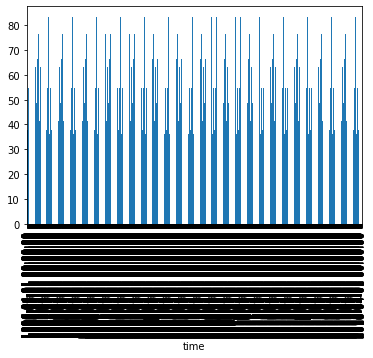

In [53]:
melted_regions.ROI_5yrs.plot(kind ="bar");

In [54]:
# #the orginal
# def melt_data(df):
#     melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
#     melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
#     melted = melted.dropna(subset=['value'])
#     return melted.groupby('time').aggregate({'value':'mean'})

In [55]:
melted_regions=melt_data(my_regions)


In [56]:
melted_regions

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,ROI_5yrs,time,value
0,60085,Waukegan,IL,Chicago,Lake,84340,384,83.493590,1996-04-01,96100.0
1,60505,Aurora,IL,Chicago,Kane,84541,1393,76.368491,1996-04-01,79300.0
2,60099,Zion,IL,Chicago,Lake,84354,3655,54.842615,1996-04-01,108700.0
3,60436,Joliet,IL,Chicago,Will,84487,6497,66.478076,1996-04-01,78200.0
4,60633,Chicago,IL,Chicago,Cook,84634,7864,37.637028,1996-04-01,77900.0
...,...,...,...,...,...,...,...,...,...,...
2645,60162,Hillside,IL,Chicago,Cook,84411,9412,48.674080,2018-04-01,173800.0
2646,60163,Berkeley,IL,Chicago,Cook,84412,11236,54.858126,2018-04-01,180100.0
2647,60165,Stone Park,IL,Chicago,Cook,84414,12717,63.179916,2018-04-01,156000.0
2648,60034,Hebron,IL,Chicago,McHenry,84298,13648,36.085627,2018-04-01,178000.0


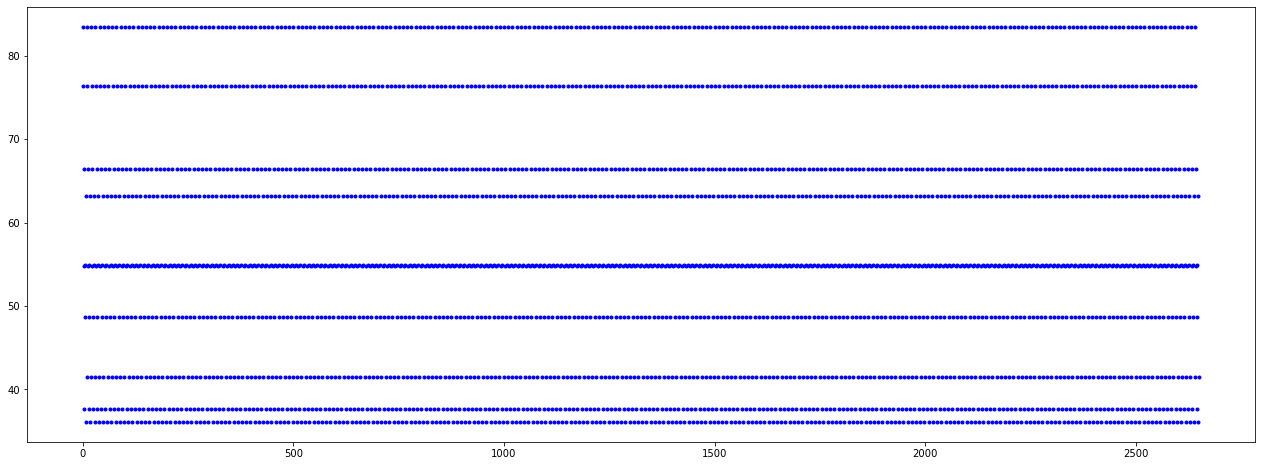

In [57]:
melted_regions.ROI_5yrs.plot(figsize = (22,8), style = 'b.')
plt.show()

# Step 5: ARIMA Modeling and others

# Random Walk

In [58]:
dates = dates = pd.date_range('2013-01-01', '2018-04-01',freq="B")

# White noise error term
error = np.random.normal(0, 10, len(dates))

# Define random walk
def random_walk(start, error):        
    Y_0 = start
    cum_error = np.cumsum(error)
    Y = cum_error + Y_0 
    return Y

shares_value = random_walk(1000, error)

shares_series = pd.Series(shares_value, index=dates)

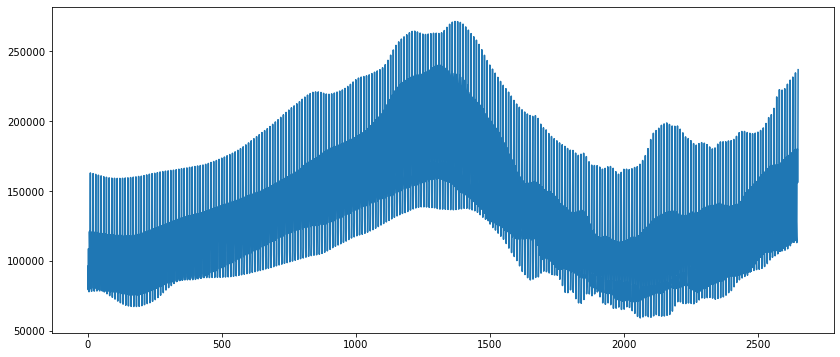

In [59]:
ax = melted_regions.value.plot(figsize=(14,6))
plt.show()

# Random walk with drift

In [ ]:
# Create a series with the specified dates
dates = pd.date_range('2010-01-01', '2010-11-30', freq='B')

# White noise error term
error = np.random.normal(0, 10, len(dates))

# Define random walk
def random_walk(start, error):        
    Y_0 = start
    cum_error = np.cumsum(error + 8)
    Y = cum_error + Y_0 
    return Y

shares_value_drift = random_walk(1000, error)

shares_series_drift =  pd.Series(shares_value_drift, index=dates)

In [ ]:
ax = melted_regions.value.plot(figsize=(14,6))
plt.show()

In [ ]:
shares_diff = shares_series.diff(periods=1)

fig = plt.figure(figsize=(18,6))
plt.plot(my_regions["value"])
plt.title('Differenced shares series')
plt.show(block=False)

In [ ]:
shares_drift_diff = shares_series_drift.diff(periods=1)

fig = plt.figure(figsize=(18,6))
plt.plot(my_regions.value)
plt.title('Differenced shares (with drift) series')
plt.show(block=False)

# Arima

In [20]:
dates = pd.date_range('2013-01-01', '2018-04-01')

In [21]:
error = np.random.normal(0, 2, len(dates))
Y_0 = 8
mu = 5
phi = 0.7

In [22]:
TS = [None] * len(dates)
y = Y_0
for i, row in enumerate(dates):
    TS[i] = mu + y * phi + error[i]
    y = TS[i] - mu

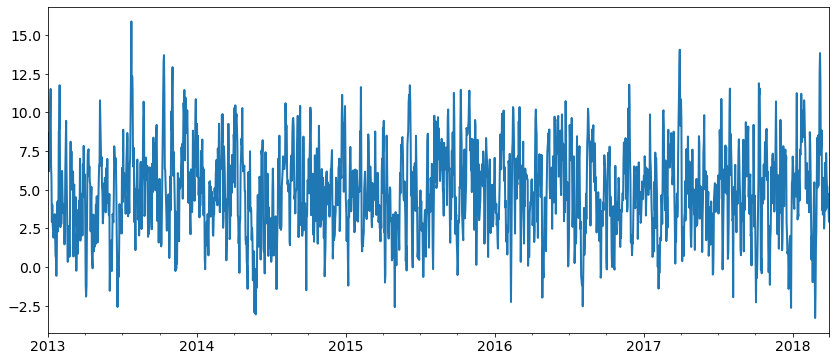

In [25]:
series = pd.Series(TS, index=dates)

series.plot(figsize=(14,6), linewidth=2, fontsize=14);

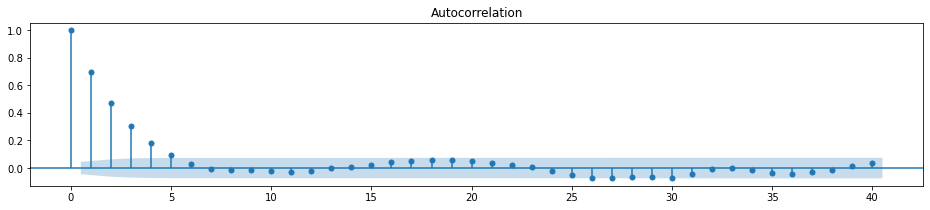

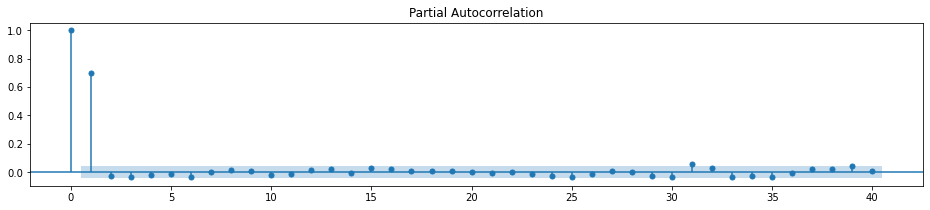

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series, ax=ax, lags=40);

In [30]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(clean_zi, order=(1,0))

ValueError: endog is required to have ndim 1 but has ndim 2

In [28]:
# Fit the model to data
res_arma = mod_arma.fit()

In [ ]:
print(res_arma.summary())

In [ ]:
print(res_arma.params)

# MA model

In [ ]:
dates =pd.date_range('2013-01-01', '2018-04-01')

error = np.random.normal(0, 4, len(dates))
mu = 7
theta = 0.9

TS = [None] * len(dates)
error_prev = error[0]
for i, row in enumerate(dates):
    TS[i] = mu + theta * error_prev + error[i]
    error_prev = error[i]
    

In [ ]:
series = pd.Series(TS, index=dates)

series.plot(figsize=(14,6), linewidth=2, fontsize=14);

In [ ]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series, ax=ax, lags=40);

In [ ]:
#Instantiate and fit an MA(1) model to the simulated data
mod_arma = ARMA(series, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

In [ ]:
# Print out the estimate for the constant and for theta
print(res_arma.params)

# Sarima model

In [ ]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.my_regions.value.SARIMAX("value",
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [ ]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

In [ ]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(CO2, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

In [ ]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [ ]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_conf = pred.conf_int()

In [ ]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = CO2['1990':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [ ]:
# Get the real and predicted values
CO2_forecasted = pred.predicted_mean
CO2_truth = CO2['1998-01-01':]

# Compute the mean square error
mse = ((CO2_forecasted - CO2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# Plot the dynamic forecast with confidence intervals.

ax = CO2['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), CO2_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [ ]:
# Extract the predicted and true values of our time series
CO2_forecasted = pred_dynamic.predicted_mean
CO2_truth = CO2['1998-01-01':]

# Compute the mean square error
mse = ((CO2_forecasted - CO2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

In [ ]:
# Plot future predictions with confidence intervals
ax = CO2.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

# modeling per zipcode

In [14]:
my_regions

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_5yrs
383,84340,60085,Waukegan,IL,Chicago,Lake,384,96100.0,96700.0,97100.0,...,107100,107300,106800,107200,107600,108600,110800,113400,114500,83.493590
1392,84541,60505,Aurora,IL,Chicago,Kane,1393,79300.0,80000.0,80200.0,...,118700,119500,120800,122900,125500,127600,129200,131100,132100,76.368491
3654,84354,60099,Zion,IL,Chicago,Lake,3655,108700.0,109200.0,109400.0,...,118200,120000,121100,122100,122700,123100,124700,127000,127900,54.842615
6496,84487,60436,Joliet,IL,Chicago,Will,6497,78200.0,78300.0,78400.0,...,103600,105000,107000,109200,111200,112700,114100,116100,117700,66.478076
7863,84634,60633,Chicago,IL,Chicago,Cook,7864,77900.0,78200.0,78300.0,...,104700,105400,106800,109000,110400,111500,112800,113300,113000,37.637028
9411,84411,60162,Hillside,IL,Chicago,Cook,9412,120300.0,120000.0,119700.0,...,168500,168700,169000,169300,170200,171700,172800,173500,173800,48.674080
11235,84412,60163,Berkeley,IL,Chicago,Cook,11236,121100.0,120800.0,120500.0,...,167700,168700,170200,172300,174200,175600,177300,179200,180100,54.858126
12716,84414,60165,Stone Park,IL,Chicago,Cook,12717,107100.0,106800.0,106500.0,...,148400,149200,149900,150700,152300,154300,155500,155800,156000,63.179916
13647,84298,60034,Hebron,IL,Chicago,McHenry,13648,112900.0,112800.0,112800.0,...,163900,167700,168700,170300,172900,175800,177100,177500,178000,36.085627
14316,84426,60180,Union,IL,Chicago,McHenry,14317,162900.0,162400.0,161900.0,...,217300,222500,222200,223200,226400,229300,231500,234500,236800,41.457587


In [15]:
per_zip_=my_regions.set_index('RegionName', inplace=True)

In [16]:
my_regions = my_regions.T
my_regions

RegionName,60085,60505,60099,60436,60633,60162,60163,60165,60034,60180
RegionID,84340,84541,84354,84487,84634,84411,84412,84414,84298,84426
City,Waukegan,Aurora,Zion,Joliet,Chicago,Hillside,Berkeley,Stone Park,Hebron,Union
State,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL
Metro,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago
CountyName,Lake,Kane,Lake,Will,Cook,Cook,Cook,Cook,McHenry,McHenry
...,...,...,...,...,...,...,...,...,...,...
2018-01,108600,127600,123100,112700,111500,171700,175600,154300,175800,229300
2018-02,110800,129200,124700,114100,112800,172800,177300,155500,177100,231500
2018-03,113400,131100,127000,116100,113300,173500,179200,155800,177500,234500
2018-04,114500,132100,127900,117700,113000,173800,180100,156000,178000,236800


In [17]:
clean_zip_Df= my_regions.drop(['RegionID' , 'City',"State","Metro","CountyName","SizeRank"])

In [18]:
clean_zip_Df

RegionName,60085,60505,60099,60436,60633,60162,60163,60165,60034,60180
1996-04,96100,79300,108700,78200,77900,120300,121100,107100,112900,162900
1996-05,96700,80000,109200,78300,78200,120000,120800,106800,112800,162400
1996-06,97100,80200,109400,78400,78300,119700,120500,106500,112800,161900
1996-07,97300,80100,109300,78500,78500,119300,120200,106200,112700,161300
1996-08,97200,79700,109100,78600,78500,119000,119900,105800,112800,160800
...,...,...,...,...,...,...,...,...,...,...
2018-01,108600,127600,123100,112700,111500,171700,175600,154300,175800,229300
2018-02,110800,129200,124700,114100,112800,172800,177300,155500,177100,231500
2018-03,113400,131100,127000,116100,113300,173500,179200,155800,177500,234500
2018-04,114500,132100,127900,117700,113000,173800,180100,156000,178000,236800


C:\Users\jstep\anaconda3\envs\usa\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

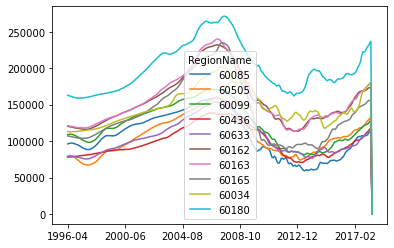

In [19]:
clean_zip_Df.plot()

In [33]:
all_columns = list(clean_zip_Df) # Creates list of all column headers
clean_zip_Df[all_columns] = clean_zip_Df[all_columns].astype(str)

In [34]:
clean_zip_Df.index

Index(['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01',
       ...
       '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
       '2018-02', '2018-03', '2018-04', 'ROI_5yrs'],
      dtype='object', length=266)

In [35]:
clean_zip_Df.drop(index=[[0:100]])

SyntaxError: invalid syntax (<ipython-input-35-0c76e2d5fb5d>, line 1)

In [36]:
clean_zip_Df=clean_zip_Df.drop([[clean_zip_Df.index[0:100]],axis=1])

SyntaxError: invalid syntax (<ipython-input-36-dba57d5d16e4>, line 1)

In [43]:
clean_zip_Df

RegionName,60085,60505,60099,60436,60633,60162,60163,60165,60034,60180
1996-04,96100.0,79300.0,108700.0,78200.0,77900.0,120300.0,121100.0,107100.0,112900.0,162900.0
1996-05,96700.0,80000.0,109200.0,78300.0,78200.0,120000.0,120800.0,106800.0,112800.0,162400.0
1996-06,97100.0,80200.0,109400.0,78400.0,78300.0,119700.0,120500.0,106500.0,112800.0,161900.0
1996-07,97300.0,80100.0,109300.0,78500.0,78500.0,119300.0,120200.0,106200.0,112700.0,161300.0
1996-08,97200.0,79700.0,109100.0,78600.0,78500.0,119000.0,119900.0,105800.0,112800.0,160800.0
...,...,...,...,...,...,...,...,...,...,...
2018-01,108600,127600,123100,112700,111500,171700,175600,154300,175800,229300
2018-02,110800,129200,124700,114100,112800,172800,177300,155500,177100,231500
2018-03,113400,131100,127000,116100,113300,173500,179200,155800,177500,234500
2018-04,114500,132100,127900,117700,113000,173800,180100,156000,178000,236800


In [42]:
clean_zip_Df.ROI_5yrs.plot()

AttributeError: 'DataFrame' object has no attribute 'ROI_5yrs'

In [38]:
clean_zip_Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 1996-04 to ROI_5yrs
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   60085   266 non-null    object
 1   60505   266 non-null    object
 2   60099   266 non-null    object
 3   60436   266 non-null    object
 4   60633   266 non-null    object
 5   60162   266 non-null    object
 6   60163   266 non-null    object
 7   60165   266 non-null    object
 8   60034   266 non-null    object
 9   60180   266 non-null    object
dtypes: object(10)
memory usage: 22.9+ KB


In [41]:
df_60099=clean_zip_Df.loc[:,["60099"]]
df_60099

KeyError: "None of [Index(['60099'], dtype='object', name='RegionName')] are in the [columns]"

In [40]:
mod_60099 = ARMA(df_60099.values, order=(1,0))

NameError: name 'df_60099' is not defined

In [123]:
# Fit the model to data
res_arma_60099 = mod_60099.fit()

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [ ]:
# Print out summary information on the fit
print(res_arma.summary())

# Step 6: Interpreting Results

Aic
